In [5]:
import pandas as pd
from collections import defaultdict
from collections import Counter
from pathlib import Path
from bs4 import BeautifulSoup
import requests
import csv 
import re
from langdetect import detect
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer 
from nltk.tokenize import RegexpTokenizer
import json
import nltk
import re
import heapq
import math
import string
import matplotlib.pyplot as plt

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Luca
[nltk_data]     Palluzzi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
f = open("homework.txt", "w")

for i in range(1,301):
    page = requests.get("https://www.goodreads.com/list/show/1.Best_Books_Ever?page=" + str(i))
    soup = BeautifulSoup(page.content, features="lxml")
    links = soup.find_all('a', itemprop='url', class_='bookTitle')
    for link in links:
        fullLink = link.get('href')
        f.write('https://www.goodreads.com' + fullLink + '\n')
f.close()

In [13]:
path = 'D:/Storage file PC/Documenti/Università/Data Science/Anno 1/Semestre 1/Algorthmic Methods of Data Mining/Homeworks/HW3/st/'

f = open("homework.txt", "r")

ff = f.readlines()

for i in range(30000, len(ff)+1):
    
    folderName = "folder-" + str(i) + "/"
    fileName = "article_" + str(i) + ".html"
    

    url = ff[i-1]
    
    Path(path + folderName).mkdir(parents=True, exist_ok=True)

    page = requests.get(url)
    code = str(page.text)

    with open(path + folderName + fileName, "w", encoding="utf-8") as z:
        z.write(code)

    z.close()
f.close()

In [15]:
personalPath = "D:/Storage file PC/Documenti/Università/Data Science/Anno 1/Semestre 1/Algorthmic Methods of Data Mining/Homeworks/HW3/st/folder-"

In [ ]:
data = ['bookTitle', 'bookSeries', 'bookAuthors', 'ratingValue', "ratingCount",\
        "reviewCount", "plot", "numberOfPages", "publishingDate", "characters", "setting", "url"]

personalPath = "D:/Storage file PC/Documenti/Università/Data Science/Anno 1/Semestre 1/Algorthmic Methods of Data Mining/Homeworks/HW3/st/folder-"

for i in range(18001, 30001):
    with open(personalPath + str(i) + "/article_" + str(i) + ".html", 'rb') as html: 
        soup = BeautifulSoup(html,"html.parser")
    #plot = soup.find('div',id='description').text.strip()  
    try:
        plot = soup.find('div',id='description').text.strip()
        if detect(plot)=='en':
            lista=[]

            #title
            try:
                lista.append(soup.find('h1').text.strip())
            except:
                lista.append('')

                #bookseries
            try:
                lista.append(soup.find('h2',id='bookSeries').text.strip())
            except:
                lista.append('')

                #author name
            try:
                lista.append(soup.find('a',class_='authorName').text.strip())
            except:
                lista.append('')

                #rating value
            try:
                lista.append(soup.find('span', itemprop='ratingValue').text.strip())
            except:
                lista.append('')

                #ratingCount
            try:
                lista.append(soup.find_all('a',class_='gr-hyperlink',href='#other_reviews')[0]\
                             .text.strip().replace('\r', '').replace('\n', '').split()[0])
            except:
                lista.append('')

                #reviewCount
            try:
                lista.append(soup.find_all('a',class_='gr-hyperlink',href='#other_reviews')[1]\
                             .text.strip().replace('\r', '').replace('\n', '').split()[0])
            except:
                lista.append('')

                #plot
            try:
                if plot[-7:] == '...more':
                    lista.append(soup.find('div',id='description').contents[3].text)
                else:
                    lista.append(plot)
            except:
                lista.append('')

                #number of pages
            try:
                lista.append(soup.find('span', itemprop='numberOfPages').text.strip().split()[0])
            except:
                lista.append('')

                #Publishing Date
            try:
                a=soup.find_all('div', class_='row')[1].text
                match_obj = re.split('Published', re.split('by', a)[0])[1]
                lista.append(match_obj.strip())
            except:
                lista.append('')

                #characters
            try:
                l1=[]
                for d in soup.find_all('a',href=re.compile(r'/characters/*')):
                    l1.append(d.text)
                    s1=",".join(l1)
                lista.append(s1)
            except:
                lista.append('')

                #setting
            try:
                l2=[]
                for e in soup.find_all('a',href=re.compile(r'/places/*')):
                    l2.append(e.text)
                    s2=",".join(l2)
                lista.append(s2)
            except:
                lista.append('')

                #URL
            lista.append(soup.find('link')['href'].strip())

            path = personalPath + str(i) + '/article_' + str(i)+ '.tsv'

            with open(path, 'w', newline='',encoding="utf-8") as f_output:
                tsv_output = csv.writer(f_output, delimiter='\t')
                tsv_output.writerow(data)
                tsv_output.writerow(lista)
                f_output.close()
        
        else:
            print('This book is not in english: '+ str(i))
            
    except:
        print('Missing plot for book: '+ str(i))

In [16]:
i = 1
index = 1

new_file = open('index_books.tsv', 'w')

while i <= 30000:
    try:
        art_f = open(personalPath + str(i) + "/article_" + str(i) + ".tsv", 'r')
        art = art_f.readlines()[1]
        new_file.write(str(index) + "\t" + art)
        art_f.close()
        i += 1
        index += 1
    except:
        i += 1

new_file.close()

In [2]:
nodigit = lambda wordslist : [word for word in wordslist if word.isalpha()]

In [ ]:


f = open("books.tsv", 'r')
books = f.readlines()

new_file = open('vocabolary.tsv', 'w')

ps = PorterStemmer()

term_id = 1
document_id = 1

vocabolary = dict()
diz = defaultdict(set)

for book in books:
    tokenizer = RegexpTokenizer(r"[a-zA-Z]+") 
    text_tokens = nodigit(tokenizer.tokenize(book.split('\t')[6]))
    tokens_without_sw = {word for word in text_tokens if not word in stopwords.words()}
    for word in tokens_without_sw:
        w = ps.stem(word.lower())
        if w not in vocabolary:
            vocabolary[w] = term_id
            diz[term_id].add(document_id)
            new_file.write(w + "\t" + str(term_id) + '\n')
            term_id += 1
        else:
            diz[vocabolary[w]].add(document_id)
    print('Finished document ' + str(document_id))
    document_id += 1
    
new_file.close()
f.close()


with open("dictionary.json", "w") as outfile: 
    json.dump(dict(zip(diz.keys(), map(list, diz.values()))), outfile, indent = 4)

In [26]:
ds = pd.read_csv('index_books.tsv', header=None, sep='\t', usecols=[0,1,7,12])

ds.rename(columns={0:'index', 1:'bookTitle', 7:'plot', 12:'url'}, inplace=True)

voc = dict()
with open('vocabolary.tsv') as f:
    for col1, col2 in csv.reader(f, delimiter='\t'):
        voc[col1] = col2
        
with open('dictionary.json') as f:
    dt = json.load(f) # dictionary


def query(q):

    ps = PorterStemmer()

    q = q.strip().split() # input from user
    
    ps = PorterStemmer()
    q = [ps.stem(w).lower() for w in q]

    # elaborate query
    
    # take term_id(s)
    term = list()
    for w in q:
        try:
            term.append(voc[w])
        except:
            pass
    # matching documents
    if len(term):
        doc = set(dt[term[0]])
        for i in range(1, len(term)):
            doc = doc.intersection(dt[term[i]])
        # take row from books
        return ds[ds['index'].isin(list(doc))][['index', 'bookTitle', 'plot', 'url']].head()
    else:
        return "There aren't documents for each word of this query"

In [ ]:
voc = dict()
with open('vocabolary.tsv') as f:
    for col1, col2 in csv.reader(f, delimiter='\t'):
        voc[col1] = col2
        
with open('dictionary.json') as f:
    dt = json.load(f) # dictionary
    
ds = dict()
with open('index_books.tsv') as f:
    for row in csv.reader(f, delimiter='\t'):
        if len(row) == 13:
            ds[row[0]] = row[7]


result = defaultdict(list)
term_idf = defaultdict(float)

for doc_id in ds:
    
    ps = PorterStemmer()
    tokenizer = RegexpTokenizer(r"[a-zA-Z]+") 
    text_tokens = nodigit(tokenizer.tokenize(ds[doc_id]))
    tokens_without_sw = [ps.stem(w.lower()) for w in text_tokens if not w in stopwords.words()]
    
    plotLength = len(tokens_without_sw)
    count = Counter(tokens_without_sw)
    
    for word in count:
        freq = count[word]
        try:
            term_id = str(voc[word])
            idf = 1.0 + math.log( float(len(ds)) / len( dt[term_id] ) )
            tf = freq / plotLength
            tfIdf = tf * idf

            
            heapq.heappush(result[term_id], (tfIdf, doc_id))
            term_idf[term_id] = idf

        except:
            pass

inv_ind = defaultdict(list)
for term, tup_list in result.items():
    for tup in tup_list:
        inv_ind[term].append( (int(tup[1]), tup[0]) )


with open("inverted_index.json", "w") as outfile: 
    json.dump(result, outfile, indent = 4)

with open("term_idf.json", "w") as outfile: 
    json.dump(term_idf, outfile, indent = 4)

In [25]:
with open('term_idf.json') as f:
    term_idf = json.load(f)

with open('inverted_index2.json') as f:
    inverted = json.load(f)
    
inv_ind = defaultdict(dict)
for term in inverted:
    for t in inverted[term]:
        inv_ind[term][t[0]] = t[1]

dot = lambda x, y : sum(xi*yi for xi, yi in zip(x, y))
square = lambda x : [v**2 for v in x]
det = lambda x : math.sqrt(sum(square(x)))
    
def similarity(q):
    ps = PorterStemmer()
    # execute query
    err = "There aren't documents for each word of this query"
    q_result = query(q)
    if not isinstance(q_result, str):
        q = q.strip().split() # input from user
        q = [ps.stem(w).lower() for w in q]
        # create a list of ifidf of terms
        term_ifidf = list()
        tf = 1/len(q)
        for w in q:
            term_ifidf += [term_idf[voc[w]]*tf]
        # create a list of ifidf of document
        doc_ifidf = defaultdict(list)
        for d_id in q_result['index']:
            for w in q:
                doc_ifidf[d_id].append(inv_ind[voc[w]][d_id])
        #compare value and calculate similarity
        cos_sim = list()
        det_q = det(term_ifidf)
        for doc in q_result['index']:
            prod = dot(doc_ifidf[doc], term_ifidf)
            det_doc = det(doc_ifidf[doc])
            cos_sim += [(prod / (det_q * det_doc))]
        q_result['similarity'] = cos_sim
        return q_result.sort_values(by=['similarity', 'index'], ascending=False)[['index','bookTitle', 'plot', 'url', 'similarity']].head()
    else:
        return err


In [21]:
ds = pd.read_csv('index_books.tsv', header=None, sep='\t', error_bad_lines = False)
ds.rename(columns={0:'index', 1:'bookTitle', 2:'bookSeries', 3:'bookAuthors', 4:'ratingValue', 5:'ratingCount', 6:'reviewCount', 7:'plot', 8:'numberOfPages', 9:'publishingDate', 10:'characters', 11:'setting', 12:'url'}, inplace=True)

b'Skipping line 952: expected 13 fields, saw 15\nSkipping line 1018: expected 13 fields, saw 15\nSkipping line 1070: expected 13 fields, saw 15\nSkipping line 1090: expected 13 fields, saw 15\nSkipping line 1144: expected 13 fields, saw 15\nSkipping line 1229: expected 13 fields, saw 15\nSkipping line 1337: expected 13 fields, saw 15\nSkipping line 1518: expected 13 fields, saw 15\nSkipping line 1837: expected 13 fields, saw 15\nSkipping line 1955: expected 13 fields, saw 15\nSkipping line 2075: expected 13 fields, saw 15\nSkipping line 2125: expected 13 fields, saw 15\nSkipping line 2136: expected 13 fields, saw 15\nSkipping line 2550: expected 13 fields, saw 15\nSkipping line 2588: expected 13 fields, saw 15\nSkipping line 2630: expected 13 fields, saw 15\nSkipping line 2638: expected 13 fields, saw 15\nSkipping line 2716: expected 13 fields, saw 15\nSkipping line 2735: expected 13 fields, saw 15\nSkipping line 2851: expected 13 fields, saw 15\nSkipping line 2911: expected 13 fields,

In [17]:
def normDate(x):
    r = list()
    for e in x.fillna(''):
        v = e.replace('th', ' ').replace('nd', ' ').replace('st', ' ').replace('rd', ' ')\
                       .translate(str.maketrans('', '', string.punctuation)).split()
        if len(v) <= 3 or len(v) != 0:
            r.append(v)
    return r


def truncate(n):
    n = str(n).replace('',' ').split()
    n.reverse()
    for i in range(1, len(n)):
        v = int(n[i])
        if int(n[i-1]) >= 5:
            n[i] = str(v+1)
    n.reverse()
    return int(n[0] + '0'*(len(n)-1))

normString = lambda x : [i.translate(str.maketrans('', '', string.punctuation)).lower().split() if len(i) > 0 else None for i in x.fillna('')  ]
normFloat = lambda x : [round(float(str(i).replace(',',''))) if i == i else 0 for i in x]
normInt = lambda x : [int(truncate(i.replace(',',''))) if i == i else 0 for i in x]
normPages = lambda x : [int(truncate(i.replace(',',''))) if i == i and i.isnumeric() else 0 for i in x]

In [54]:
n_ds = pd.DataFrame(ds['index'])
n_ds['bookTitle'] = normString(ds['bookTitle'])
n_ds['bookSeries'] = normString(ds['bookSeries'])
n_ds['bookAuthors'] = normString(ds['bookAuthors'])
n_ds['ratingValue'] = normFloat(ds['ratingValue'])
n_ds['ratingCount'] = normInt(ds['ratingCount'])
n_ds['reviewCount'] = normInt(ds['reviewCount'])
n_ds['plot'] = ds['plot']
n_ds['numberOfPages'] = normPages(ds['numberOfPages'])
n_ds['publishingDate'] = normDate(ds['publishingDate'])
n_ds['characters'] = normString(ds['characters'])
n_ds['setting'] = normString(ds['setting'])
n_ds['url'] = ds['url']

In [23]:
def search(q):
    # execute query
    err = "There aren't documents for each word of this query"
    qs = re.sub('\d', '', q.translate(str.maketrans('', '', string.punctuation)).lower())
    q_result = similarity(qs)
    if not isinstance(q_result, str):
        q = q.strip().split()
        q = [w.lower() for w in q]
        # power up of the score
        doc_score = []
        for doc_id in q_result['index']:
            score = q_result[q_result['index'] == doc_id]['similarity'].to_list()[0]
            # calculate score
            for w in q:
                t = n_ds[n_ds['index']==doc_id]['bookTitle'].to_list()[0]
                s = n_ds[n_ds['index']==doc_id]['bookSeries'].to_list()[0]
                a = n_ds[n_ds['index']==doc_id]['bookAuthors'].to_list()[0]
                c = n_ds[n_ds['index']==doc_id]['characters'].to_list()[0]
                st = n_ds[n_ds['index']==doc_id]['setting'].to_list()[0]
                d = n_ds[n_ds['index']==doc_id]['publishingDate'].to_list()[0]
                if t != None and w in t:
                    score += (1/len(t))*2
                if s != None and w in s:
                    score += (1/len(s))*1.5
                if a != None and w in a:
                    score += (1/len(a))*2
                if c != None and w in c:
                    score += (1/len(c))*1.5
                if st != None and w in st:
                    score += (1/len(st))
                if d != None and w in d:
                    score += (1/len(d))
                if w.isnumeric():
                    if truncate(w) == n_ds[n_ds['index']==doc_id]['ratingCount'].to_list()[0]:
                        score += 0.5
                    if truncate(w) == n_ds[n_ds['index']==doc_id]['numberOfPages'].to_list()[0]:
                        score += 0.5
                    if truncate(w) == n_ds[n_ds['index']==doc_id]['reviewCount'].to_list()[0]:
                        score += 0.5
                    if round(float(w)) == n_ds[n_ds['index']==doc_id]['ratingValue'].to_list()[0]:
                        score += 0.5
            heapq.heappush(doc_score, (score, doc_id))
        order_doc_id = [i[1] for i in doc_score]
        order_score = [i[0] for i in doc_score]
        r = pd.DataFrame(q_result[q_result['index']==order_doc_id[0]][['index', 'bookTitle', 'plot', 'url']])
        for d_id in range(1, len(order_doc_id)):
            r = r.append(q_result[q_result['index']==order_doc_id[d_id]][['index', 'bookTitle', 'plot', 'url']])
        r['score'] = order_score
        return r.sort_values(by=['score', 'index'], ascending=False)[['index', 'bookTitle', 'plot', 'url', 'score']].head()
    else:
        return err

In [27]:
search('winter love games 4.5')

,index,bookTitle,plot,url,score
20242,23380,Winter in Madrid,Fans of Carlos Ruiz Zafón’s The Shadow of the ...,https://www.goodreads.com/book/show/891671.Win...,1.618429
9648,11025,Sashenka,"Winter, 1916: In St Petersburg, Russia on the ...",https://www.goodreads.com/book/show/3929671-sa...,1.000000


In [18]:
def inorder(s):
    t = True
    for i in range(1, len(s)):
        if ord(s[i-1]) >= ord(s[i]):
            t = False
    return t


def subseq_rec(string, s, i, l):
    if i == len(string):
        return l
    l.append(s+string[i])
    subseq_rec(string, s+string[i], i+1, l)
    subseq_rec(string, s, i+1, l)

def subseq(string):
    string = string.upper()
    l = []
    subseq_rec(string, '', 0, l)
    c = 0
    for p in l:
        if inorder(p):
            c = max(c, len(p))
    return c

In [19]:
subseq('azzbacdiefqmsz'.upper())

9

**fare un po' di prove per mostrare la complessità**

In [61]:
def dynamic_subq(s):
    a = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    s = s.upper()
    la = len(a)+1
    ls = len(s)+1
    # create matrix
    m = [list() for _ in range(la)]
    for i in range(la):
        m[i] = [0 for _ in range(ls)]
    # fill matrix
    for i in range(1, la):
        for j in range(1, ls):
            if a[i-1] == s[j-1]:
                m[i][j] = m[i-1][j-1]+1
            else:
                m[i][j] = max(m[i-1][j], m[i][j-1])
    # return value in cell n+1, m+1
    # where n is the number of char in alphabet
    # and m is the lenght of the input string
    return m[la-1][ls-1]

In [62]:
dynamic_subq('azzzbc')

3

**anche per questo caso completare la domanda con le risposte**

# bonus punto 4

In [7]:
# take 10 first series
top_series = list()
for series in normString(ds['bookSeries']):
    if series != None:
        if len(series)>0:
            if not series[-1].isalpha():
                i = series[-1].find('–')
                j = series[-1].find('-')
                if i < 0 and j < 0:
                    if series[:-1] not in top_series:
                        top_series.append(series[:-1])
    if len(top_series) == 10:
        break

In [80]:
def cumulativeCount(x):
    r = [x[0]]
    for i in range(1, len(x)):
        r.append(r[i-1] + x[i])
    return r

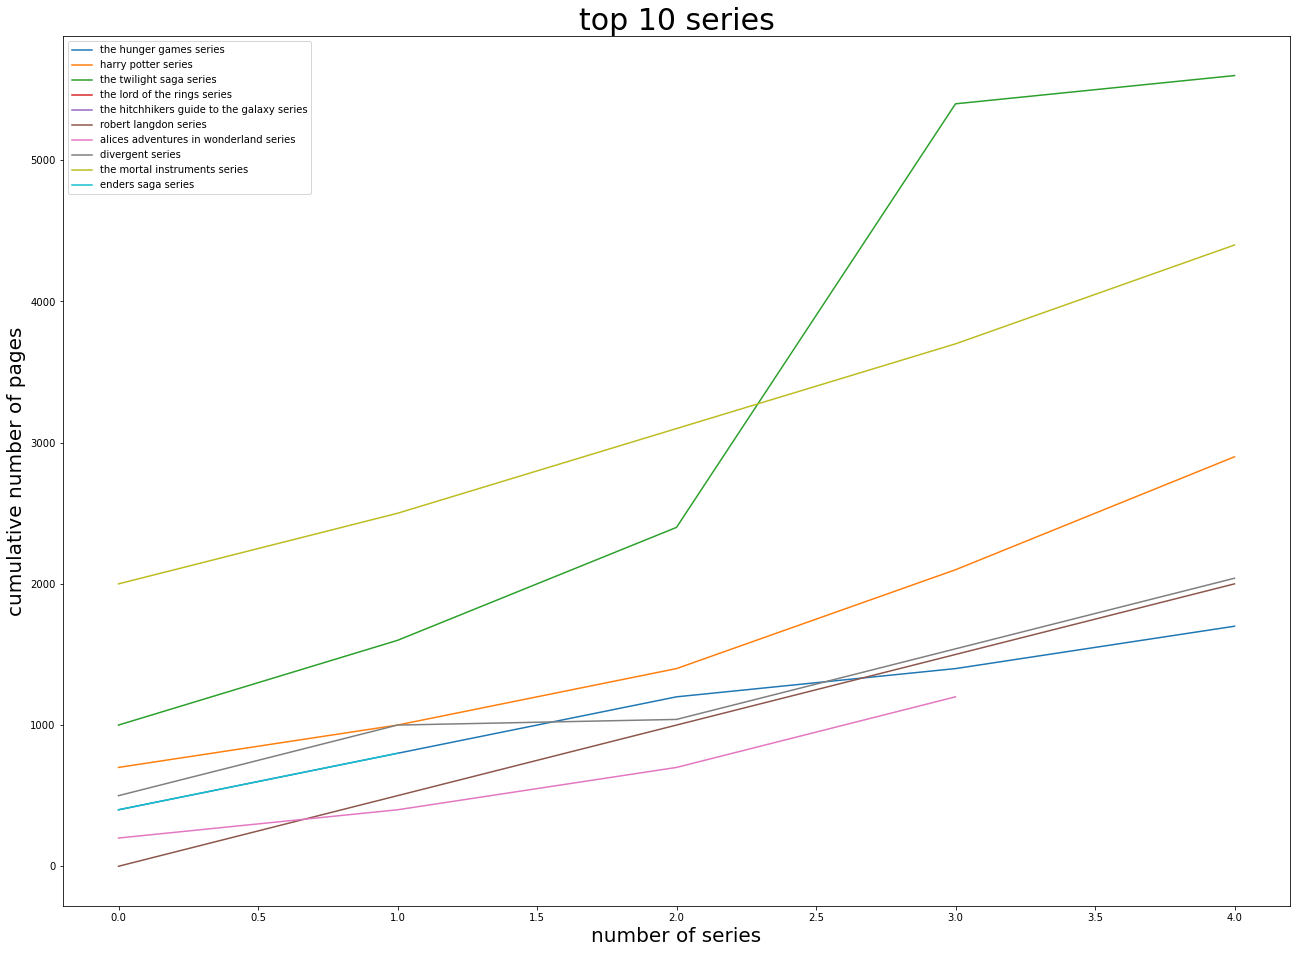

In [87]:
plt.figure(figsize=(22,16))
plt.xlabel('number of series', fontsize=20)
plt.ylabel('cumulative number of pages', fontsize=20)
plt.title('top 10 series', fontsize=30)
for series in top_series:
    s = search(' '.join(series))
    v = []
    for i in s['index']:
        r = n_ds[n_ds['index'] == i]
        v.append((int(r['publishingDate'].tolist()[-1][-1]), r['numberOfPages'].tolist()[-1]))
    v = sorted(v, key=lambda x: x[0])
    date = [t for t in range(len(v))]
    page = [t[1] for t in v]
    page = cumulativeCount(page)
    plt.plot(date, page, label = ' '.join(series) + ' series')
plt.legend()
plt.show()